In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("walmart_data.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


1) Defining Problem Statement and Analyzing basic metrics

Retailer is a leading retail company which operates retail store chains having over 100 million customers. In this project, we have Walmart's sales data for the day of Black Friday. We would analyze this data through various angles to provide insights and provide recommendations to get a better prespective of customer purchase behaviour. Hopefully, this would result in better insights into cutomer spending habits and in turn, help Walmart's stakeholders in improving their sales starategy so as to expand their business and profits.


In [4]:
df.shape

(550068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

-> From above analysis it is clear that it's a huge data. Also, we know that there are no null values in any column, so we need not handle that. Also we are not doing statistical analysis using describe() since it wouldn't give any useful results.

2) Non-Graphical Analysis: Value counts and unique attributes
3) Visual Analysis - Univariate & Bivariate

We will do value count and their visual analysis together in this step.

(Gender                         2
 Age                            7
 Occupation                    21
 City_Category                  3
 Stay_In_Current_City_Years     5
 Marital_Status                 2
 Product_Category              20
 dtype: int64,
 <Axes: >)

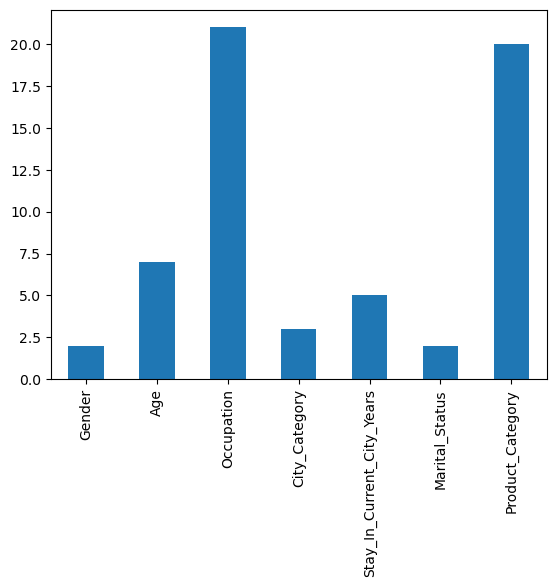

In [7]:
# We will exclude Produc_ID, User_ID and Purchase from count of unique values for data since these have continuous or large number of values

df[["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category"]].nunique(), df[["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category"]].nunique().plot(kind="bar")

-> "Occupation" and "Product_Category" have highest number of value variation. For most other categories, value count is as expected. 

(M    414259
 F    135809
 Name: Gender, dtype: int64,
 <Axes: >)

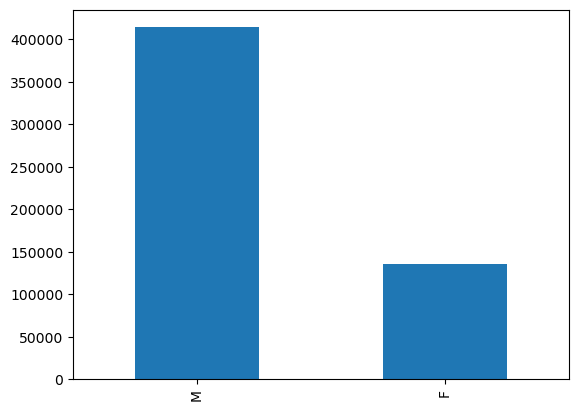

In [8]:
df["Gender"].value_counts(), df["Gender"].value_counts().plot(kind="bar")

(Gender
 F    1666
 M    4225
 Name: User_ID, dtype: int64,
 <Axes: xlabel='Gender'>)

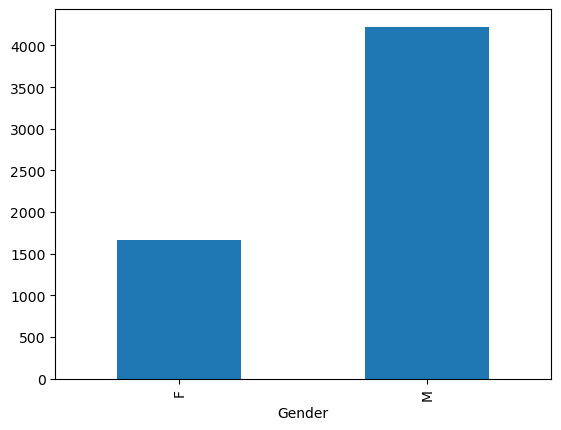

In [9]:
df.groupby("Gender")["User_ID"].nunique(), df.groupby("Gender")["User_ID"].nunique().plot(kind="bar")

-> The above analysis shows that there are more male customers than female customers and also the number of transaction is also more for male than female.

(26-35    219587
 36-45    110013
 18-25     99660
 46-50     45701
 51-55     38501
 55+       21504
 0-17      15102
 Name: Age, dtype: int64,
 <Axes: >)

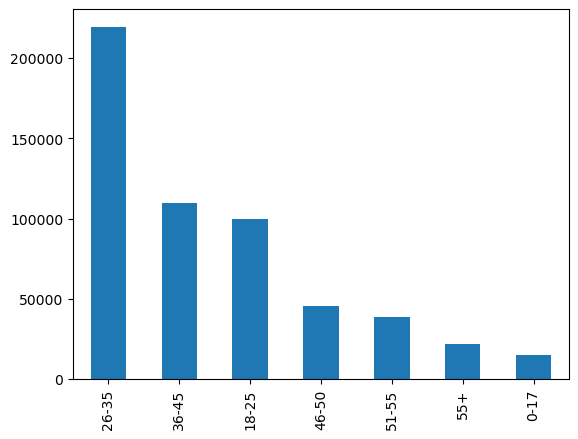

In [10]:
df["Age"].value_counts(), df["Age"].value_counts().plot(kind="bar")

-> The above analysis shows that age group [18-45] did majority of transactions.

(4     72308
 0     69638
 7     59133
 1     47426
 17    40043
 20    33562
 12    31179
 14    27309
 2     26588
 16    25371
 6     20355
 3     17650
 10    12930
 5     12177
 15    12165
 11    11586
 19     8461
 13     7728
 18     6622
 9      6291
 8      1546
 Name: Occupation, dtype: int64,
 <Axes: >)

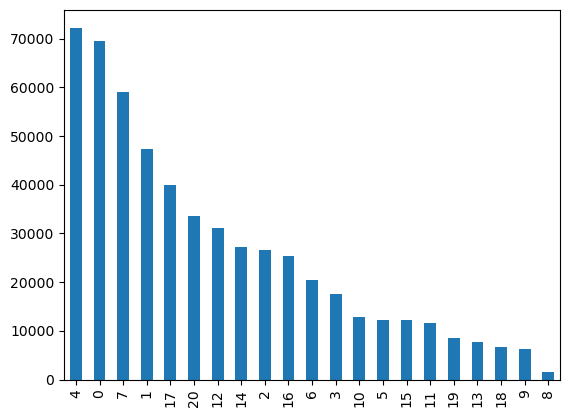

In [11]:
df["Occupation"].value_counts(), df["Occupation"].value_counts().sort_values(ascending=False).plot(kind="bar")

-> The customers belonging to occupations 4, 0 and 7 have highest number of transactions.

(B    231173
 C    171175
 A    147720
 Name: City_Category, dtype: int64,
 <Axes: >)

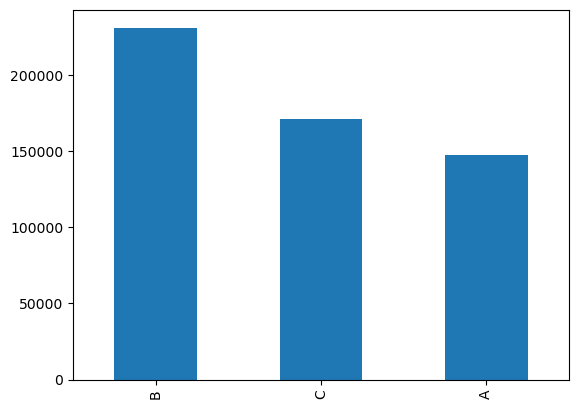

In [12]:
df["City_Category"].value_counts(), df["City_Category"].value_counts().plot(kind="bar")

-> The city B has highest number of transactions.

(1     193821
 2     101838
 3      95285
 4+     84726
 0      74398
 Name: Stay_In_Current_City_Years, dtype: int64,
 <Axes: >)

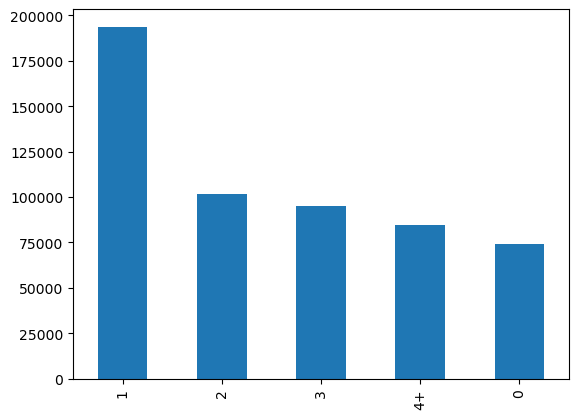

In [13]:
df["Stay_In_Current_City_Years"].value_counts(), df["Stay_In_Current_City_Years"].value_counts().plot(kind="bar")

-> Those living in the city since one year has highest number of transactions.

(0    324731
 1    225337
 Name: Marital_Status, dtype: int64,
 <Axes: >)

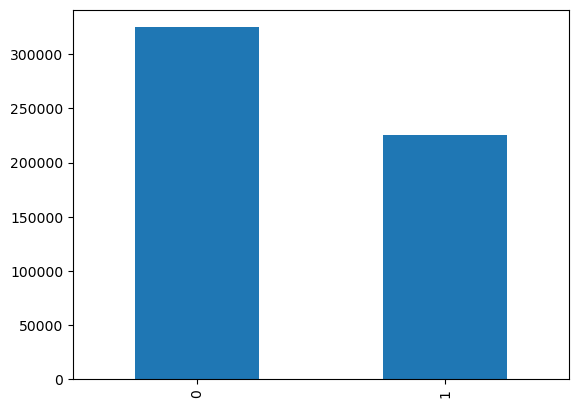

In [14]:
df["Marital_Status"].value_counts(), df["Marital_Status"].value_counts().plot(kind="bar")

-> There are more trasaction for marital status "0" than "1".

(5     150933
 1     140378
 8     113925
 11     24287
 2      23864
 6      20466
 3      20213
 4      11753
 16      9828
 15      6290
 13      5549
 10      5125
 12      3947
 7       3721
 18      3125
 20      2550
 19      1603
 14      1523
 17       578
 9        410
 Name: Product_Category, dtype: int64,
 <Axes: >)

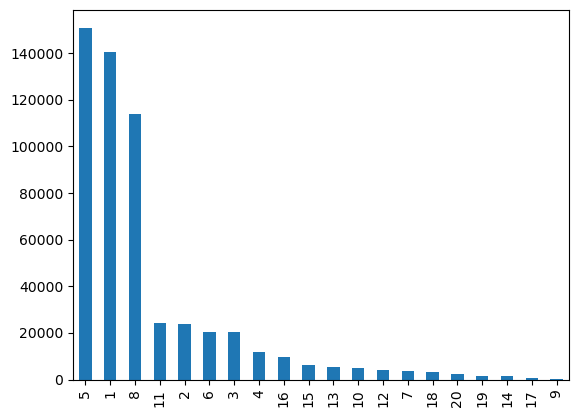

In [15]:
df["Product_Category"].value_counts(), df["Product_Category"].value_counts().plot(kind="bar")

-> The product category 5, 1 and 8 are leading by a huge margin as compared to other categories.

<Axes: >

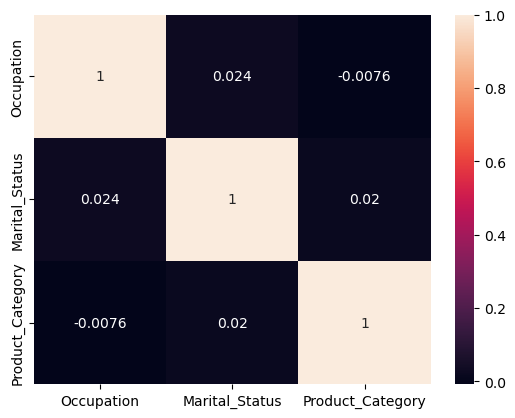

In [16]:
data = df[["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category"]]
sns.heatmap(data.corr(numeric_only="False"),annot=True)

-> There seems to be no discernible relation between the given parameters. Bi-variate analysis would not result in anything useful.

Outlier detection.


<Axes: xlabel='Gender', ylabel='Purchase'>

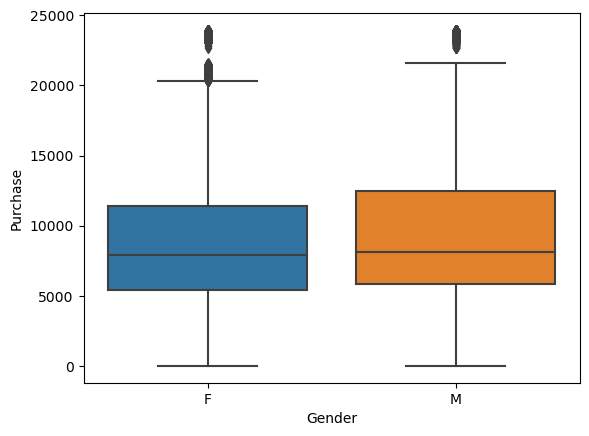

In [17]:
sns.boxplot(data=df,x="Gender",y="Purchase")

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

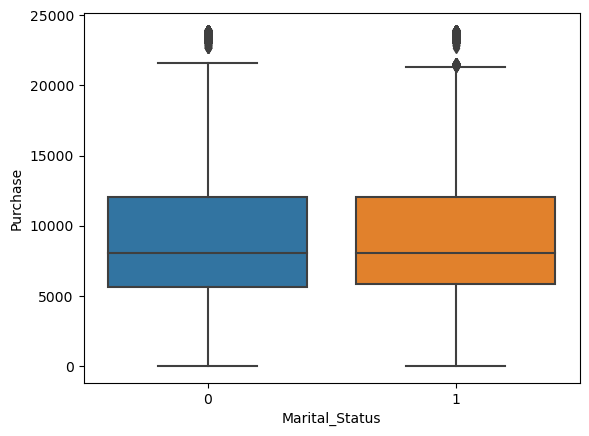

In [18]:
sns.boxplot(data=df,x="Marital_Status",y="Purchase")

-> As we can see from above when purchase is plotted against both gender and marital_status values, there are significant number of outliers. While male purchase is higher than female, the values are nearly the same for marital_status.

1) Are women spending more money per transaction than men? Why or Why not?


In [19]:
df.groupby("Gender")["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

-> As we can see from above that male have more average spending per trasaction. Hence, the answer to above question is no.

2) Confidence intervals and distribution of the mean of the expenses by female and male customers


In [20]:
def mean_cal(DF, sample_size):
    samp = DF.sample(sample_size)
    n = samp.size
    n_trials = 100000
    bs_samples = np.random.choice(samp, (n_trials,n), replace="True")
    sample_means = bs_samples.mean(axis=1)
    return sample_means

def confidence_interval(means, conf):
    if conf == 99:
        left = np.percentile(means,0.5)
        right = np.percentile(means,99.5)
    elif conf == 95:
        left = np.percentile(means, 2.5)
        right = np.percentile(means, 97.5)
    else:
        left = np.percentile(means, 5)
        right = np.percentile(means, 95)
        
    return round(left,2), round(right,2)

In [21]:
male_purchase = df[df["Gender"]=="M"]["Purchase"]
female_purchase = df[df["Gender"]=="F"]["Purchase"]


(<Axes: ylabel='Density'>, <Axes: ylabel='Density'>)

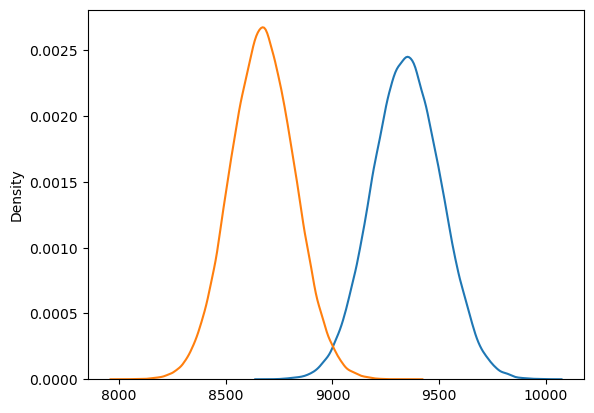

In [22]:
# we will analysize male/femal purcahses for 1000 samples

male_means = mean_cal(male_purchase,1000)
female_means = mean_cal(female_purchase,1000)

sns.kdeplot(data = male_means), sns.kdeplot(data=female_means)


In [23]:
# at 99 confidence for male
male_left_interval_99,male_right_interval_99 = confidence_interval(male_means,99)
male_left_interval_99,male_right_interval_99

(8939.25, 9766.58)

In [24]:
# at 95 confidence for male
male_left_interval_95,male_right_interval_95 = confidence_interval(male_means,95)
male_left_interval_95,male_right_interval_95

(9035.07, 9664.05)

In [25]:
# at 90 confidence for male
male_left_interval_90,male_right_interval_90 = confidence_interval(male_means,90)
male_left_interval_90,male_right_interval_90

(9084.43, 9615.79)

In [26]:
# at 99 confidence for female
female_left_interval_99,female_right_interval_99 = confidence_interval(female_means,99)
female_left_interval_99,female_right_interval_99

(8286.37, 9060.75)

In [27]:
# at 95 confidence for female
female_left_interval_95,female_right_interval_95 = confidence_interval(female_means,95)
female_left_interval_95,female_right_interval_95

(8379.46, 8967.36)

In [28]:
# at 90 confidence for female
female_left_interval_90,female_right_interval_90 = confidence_interval(female_means,90)
female_left_interval_90,female_right_interval_90

(8426.16, 8919.45)

-> As we can see from above results, male and female CI are overlapping only for 99% interval. That means that at higher ranges male and female spendings are somewhat similar. That means, for higher values of transcation male and female have similar behaviour.


(<Axes: ylabel='Density'>, <Axes: ylabel='Density'>)

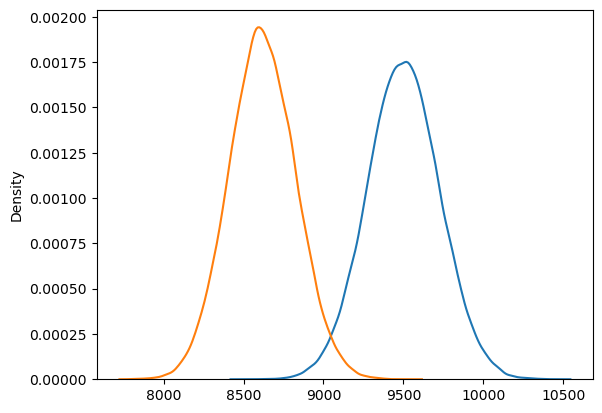

In [29]:
# now we will do the same steps for sample of 500
male_means_500 = mean_cal(male_purchase,500)
female_means_500 = mean_cal(female_purchase,500)

sns.kdeplot(data = male_means_500), sns.kdeplot(data=female_means_500)


In [30]:
# at 99 confidence for male
male_left_interval_99,male_right_interval_99 = confidence_interval(male_means_500,99)
male_left_interval_99,male_right_interval_99

(8919.51, 10085.24)

In [31]:
# at 95 confidence for male
male_left_interval_95,male_right_interval_95 = confidence_interval(male_means_500,95)
male_left_interval_95,male_right_interval_95

(9058.46, 9946.33)

In [32]:
# at 90 confidence for male
male_left_interval_90,male_right_interval_90 = confidence_interval(male_means_500,90)
male_left_interval_90,male_right_interval_90

(9129.72, 9873.72)

In [33]:
# at 99 confidence for female
female_left_interval_99,female_right_interval_99 = confidence_interval(female_means_500,99)
female_left_interval_99,female_right_interval_99

(8094.21, 9161.22)

In [34]:
# at 95 confidence for female
female_left_interval_95,female_right_interval_95 = confidence_interval(female_means_500,95)
female_left_interval_95,female_right_interval_95

(8214.54, 9030.62)

In [35]:
# at 90 confidence for female
female_left_interval_90,female_right_interval_90 = confidence_interval(female_means_500,90)
female_left_interval_90,female_right_interval_90

(8277.53, 8961.67)

-> Again, for 500 samples, only 99% CI are overlapping. That means there is overlap only for higher values of transactions for male and female purchases. That means for higher transaction value, male and female spending behaviour is same.


In [36]:
# Now we will calculate CI for marital status

ms1_purchase = df[df["Marital_Status"]==1]["Purchase"]
ms2_purchase = df[df["Marital_Status"]==0]["Purchase"]

(<Axes: ylabel='Density'>, <Axes: ylabel='Density'>)

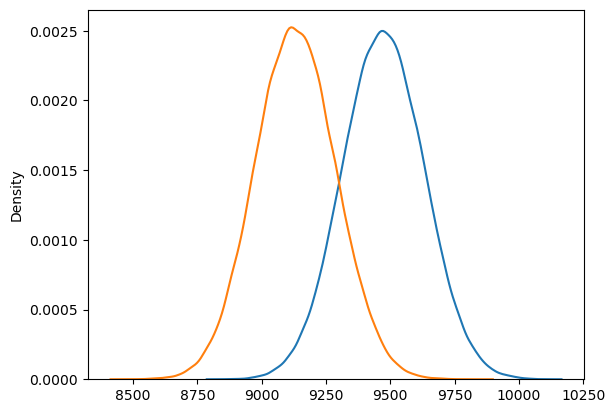

In [37]:
# CI at 1000 samples

ms1_means = mean_cal(ms1_purchase,1000)
ms2_means = mean_cal(ms2_purchase,1000)

sns.kdeplot(data = ms1_means), sns.kdeplot(data=ms2_means)

In [38]:
# at 99 confidence for ms1
ms1_means_left_interval_99,ms1_means_right_interval_99 = confidence_interval(ms1_means,99)
ms1_means_left_interval_99,ms1_means_right_interval_99

(9070.81, 9882.9)

In [39]:
# at 95 confidence for ms1
ms1_left_interval_95,ms1_right_interval_95 = confidence_interval(ms1_means,95)
ms1_left_interval_95,ms1_right_interval_95

(9165.32, 9783.73)

In [40]:
# at 90 confidence for ms1
ms1_left_interval_90,ms1_right_interval_90 = confidence_interval(ms1_means,90)
ms1_left_interval_90,ms1_right_interval_90

(9215.24, 9733.67)

In [41]:
# at 99 confidence for ms2
ms2_left_interval_99,ms2_right_interval_99 = confidence_interval(ms2_means,99)
ms2_left_interval_99,ms2_right_interval_99

(8733.75, 9536.15)

In [42]:
# at 95 confidence for ms2
ms2_left_interval_95,ms2_right_interval_95 = confidence_interval(ms2_means,95)
ms2_left_interval_95,ms2_right_interval_95

(8828.57, 9439.57)

In [43]:
# at 90 confidence for ms2
ms2_left_interval_90,ms2_right_interval_90 = confidence_interval(ms2_means,90)
ms2_left_interval_90,ms2_right_interval_90

(8876.6, 9390.49)

-> We can see the values for both marital status CI values are overlapping for all confidence level. So there is no significant difference between both marital status spending behaviour. 


(<Axes: ylabel='Density'>, <Axes: ylabel='Density'>)

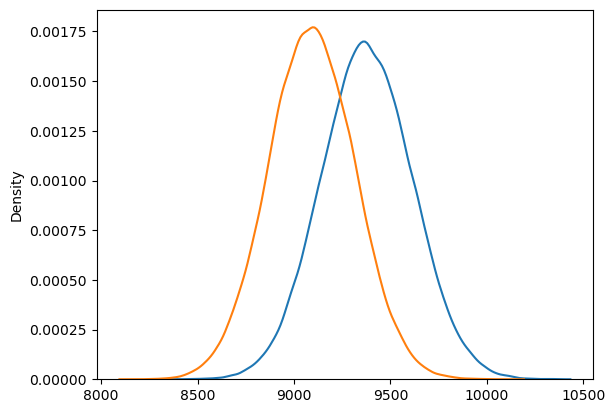

In [44]:
# Now we will do it for 500 samples

ms1_means = mean_cal(ms1_purchase,500)
ms2_means = mean_cal(ms2_purchase,500)

sns.kdeplot(data = ms1_means), sns.kdeplot(data=ms2_means)

In [45]:
# at 99 confidence for ms1
ms1_means_left_interval_99,ms1_means_right_interval_99 = confidence_interval(ms1_means,99)
ms1_means_left_interval_99,ms1_means_right_interval_99

(8776.51, 9990.03)

In [46]:
# at 95 confidence for ms1
ms1_left_interval_95,ms1_right_interval_95 = confidence_interval(ms1_means,95)
ms1_left_interval_95,ms1_right_interval_95

(8921.84, 9842.4)

In [47]:
# at 90 confidence for ms1
ms1_left_interval_90,ms1_right_interval_90 = confidence_interval(ms1_means,90)
ms1_left_interval_90,ms1_right_interval_90

(8992.57, 9766.75)

In [48]:
# at 99 confidence for ms2
ms2_left_interval_99,ms2_right_interval_99 = confidence_interval(ms2_means,99)
ms2_left_interval_99,ms2_right_interval_99

(8523.15, 9673.07)

In [49]:
# at 95 confidence for ms2
ms2_left_interval_95,ms2_right_interval_95 = confidence_interval(ms2_means,95)
ms2_left_interval_95,ms2_right_interval_95

(8656.57, 9532.47)

In [50]:
# at 90 confidence for ms2
ms2_left_interval_90,ms2_right_interval_90 = confidence_interval(ms2_means,90)
ms2_left_interval_90,ms2_right_interval_90

(8724.94, 9459.82)

-> The same behaviour is repeated for marital status when we take 500 samples. The CI values are overlapping for all confidence levels. Both marital status have no significant difference for spending behaviour.


In [51]:
# Now we will calculate CI for age

age_2635_purchase = df[df["Age"]=="26-35"]["Purchase"]
age_3645_purchase = df[df["Age"]=="36-45"]["Purchase"]
age_1825_purchase = df[df["Age"]=="18-25"]["Purchase"]
age_4650_purchase = df[df["Age"]=="18-25"]["Purchase"]
age_5155_purchase = df[df["Age"]=="18-25"]["Purchase"]
age_55_purchase = df[df["Age"]=="55+"]["Purchase"]
age_017_purchase = df[df["Age"]=="0-17"]["Purchase"]

In [52]:
# since there are too many values, we will limit our analysis to 1000 samples and 99% confidence interval

age_2635_means = mean_cal(age_2635_purchase,1000)
age_3645_means = mean_cal(age_3645_purchase,1000)
age_1825_means = mean_cal(age_1825_purchase,1000)
age_4650_means = mean_cal(age_4650_purchase,1000)
age_5155_means = mean_cal(age_5155_purchase,1000)
age_55_means = mean_cal(age_55_purchase,1000)
age_017_means = mean_cal(age_017_purchase,1000)

In [53]:
# at 99 confidence

age_2635_left_interval_99,age_2635_right_interval_99 = confidence_interval(age_2635_means,99)
age_3645_left_interval_99,age_3645_right_interval_99 = confidence_interval(age_3645_means,99)
age_1825_left_interval_99,age_1825_right_interval_99 = confidence_interval(age_1825_means,99)
age_4650_left_interval_99,age_4650_right_interval_99 = confidence_interval(age_4650_means,99)
age_5155_left_interval_99,age_5155_right_interval_99 = confidence_interval(age_5155_means,99)
age_55_left_interval_99,age_55_right_interval_99 = confidence_interval(age_55_means,99)
age_017_left_interval_99,age_017_right_interval_99 = confidence_interval(age_017_means,99)

(age_2635_left_interval_99,age_2635_right_interval_99), (age_3645_left_interval_99,age_3645_right_interval_99), (age_1825_left_interval_99,age_1825_right_interval_99), (age_4650_left_interval_99,age_4650_right_interval_99), (age_5155_left_interval_99,age_5155_right_interval_99), (age_55_left_interval_99,age_55_right_interval_99), (age_017_left_interval_99,age_017_right_interval_99)   

((8969.43, 9769.05),
 (8885.25, 9723.72),
 (9157.06, 9997.73),
 (8644.11, 9455.6),
 (8695.53, 9507.19),
 (8969.81, 9780.9),
 (8368.51, 9215.11))

-> As we can decode from above results, CI values at 99% confidence are overlapping for all age groups. This implies there is no significant diffence between their spending behaviour.


6) Recommendations

a) The male are in majority both in terms of number of customers and number of transactions. Walmart should increase their reach among female customers by offering discounts. One more thing that could be tried is that a day could be reserved per month as women-only shoppers.

b) City B is leading the number of purchases done on Black Friday. Walmart should increase their marketing strategy for city C and A to increase the number of purchases.

c) It can be seen that those who have stayed in city for duration of less than or equal to one year do maximum transactions. This might be since they are new and don't know the options available. The old residents move to other options as they become more aware of the city. Walmart should focus on retention of old custoemrs by studying the competiting businesses.

d) Age group [18-45] does maximum number of transactions. Walmart should make more products available targeted at this age group. Simultaneously, efforts should be made to increase the outreach to other less represented groups.

e) There is no significant difference between male and female for high purchase amount. Both should be equally favored for targeted marketing and discounts/deals.

f) There is no significant difference between spending either any marital status. The current strategy should work fine.

g) Product of categories 5,1 and 8 are most sold. These should be stocked well.